<a href="https://colab.research.google.com/github/jyotiprasadkurmi/truemeds/blob/main/truemeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definitions: Events:
* (i) app_order_placed: customer places an order on the app
* (ii) box_verified: order is packed and ready to ship.
* (iii) order_delivered: customer has an order delivered.
* Funnel: App_order_placed -> box_verified -> order_delivered
* Install time: Time when the install occurred.
* Event time: Time when the event (refer above) occurred.
* Media Sources: Two Media sources ‘Rocketship’ & ‘Trophywise’ , channels within Media sources shared below
* Campaign ID: Campaigns running within the media sources

Parameters definition:

* Has_coupon_code - if the customer has used a coupon code.
* No_of_items - number of items added to cart in placing the order or later
* Is_switch_added - if customer has accepted the switch of the product
* Is_addons_added - if customer has added additional segment of products termed ‘add ons’
* Is_core_customer - if Cx is categorised as core: Core customers are those who have the highest probability to switch given their income group, but might not necessarily switch.

In [104]:
#Importing libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://drive.google.com/file/d/1v2cNb9RgpfsTu4nn14ZcE2hw7CHRsQ2x/view?usp=sharing

--2024-07-24 23:49:14--  https://drive.google.com/file/d/1v2cNb9RgpfsTu4nn14ZcE2hw7CHRsQ2x/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.1’

view?usp=sharing.1      [ <=>                ]  86.45K  --.-KB/s    in 0.002s  

2024-07-24 23:49:14 (42.4 MB/s) - ‘view?usp=sharing.1’ saved [88529]



In [8]:
#reading the csv file here
df = pd.read_csv("/content/drive/MyDrive/Business Analyst _ Assignment _ Dataset (1).xlsx - com.intellihealth.truemeds_in-a.csv")
df.head()

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Cost Model,Cost Value,Partner,Media Source,...,App Version,SDK Version,App ID,App Name,Is Retargeting,Retargeting Conversion Type,Is Primary Attribution,Reengagement Window,Original URL,Device Model
0,2/24/24 0:19,2/24/24 0:29,2/25/24 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,OPPO::CPH2127
1,2/25/24 23:33,2/25/24 23:40,2/25/24 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,Redmi::Redmi 8A Dual
2,2/25/24 23:40,2/25/24 23:51,2/25/24 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,samsung::SM-A042F
3,2/23/24 23:53,2/24/24 0:01,2/25/24 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,NaN,NaN,NaN,Trophywise,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,False,NaN,NaN,samsung::SM-M136B
4,2/25/24 19:14,2/25/24 19:20,2/25/24 23:52,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,samsung::SM-A505F


In [9]:
#checking the shape
df.shape

(84218, 33)

In [11]:
#checking for null values
df.isna().sum()

Attributed Touch Time              0
Install Time                       0
Event Time                         0
Event Name                         0
Parameters                         0
Event Revenue                   4161
Cost Model                     84218
Cost Value                     84218
Partner                        84218
Media Source                       0
Channel                            0
Campaign ID                        0
Country Code                       0
State                              5
City                               8
Operator                       46431
Carrier                        47048
Language                       46241
Unnamed: 18                    84218
Unnamed: 19                    84218
Device Category                46241
Platform                           0
OS Version                     46241
App Version                        0
SDK Version                    46241
App ID                             0
App Name                       46241
I

In [13]:
#checking_null_in_percentage
null_percentage = df.isna().sum()*100/len(df)
null_percentage

Attributed Touch Time            0.000000
Install Time                     0.000000
Event Time                       0.000000
Event Name                       0.000000
Parameters                       0.000000
Event Revenue                    4.940749
Cost Model                     100.000000
Cost Value                     100.000000
Partner                        100.000000
Media Source                     0.000000
Channel                          0.000000
Campaign ID                      0.000000
Country Code                     0.000000
State                            0.005937
City                             0.009499
Operator                        55.131920
Carrier                         55.864542
Language                        54.906315
Unnamed: 18                    100.000000
Unnamed: 19                    100.000000
Device Category                 54.906315
Platform                         0.000000
OS Version                      54.906315
App Version                      0

In [16]:
#removing the columns with more than 70% of null value as they won't help in analysis
to_drop_col = null_percentage[null_percentage > 70].keys()
to_drop_col

Index(['Cost Model', 'Cost Value', 'Partner', 'Unnamed: 18', 'Unnamed: 19',
       'Retargeting Conversion Type', 'Reengagement Window', 'Original URL'],
      dtype='object')

In [20]:
df.drop(to_drop_col,axis = 1, inplace = True)

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,Country Code,...,Device Category,Platform,OS Version,App Version,SDK Version,App ID,App Name,Is Retargeting,Is Primary Attribution,Device Model
0,2/24/24 0:19,2/24/24 0:29,2/25/24 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,IN,...,phone,android,12,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,OPPO::CPH2127
1,2/25/24 23:33,2/25/24 23:40,2/25/24 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,Rocketship,Rocketship Partner 4,2.385290e+16,IN,...,phone,android,10,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,Redmi::Redmi 8A Dual
2,2/25/24 23:40,2/25/24 23:51,2/25/24 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,Rocketship,Rocketship Partner 4,1.202040e+17,IN,...,phone,android,14,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,samsung::SM-A042F
3,2/23/24 23:53,2/24/24 0:01,2/25/24 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,IN,...,phone,android,14,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,False,samsung::SM-M136B
4,2/25/24 19:14,2/25/24 19:20,2/25/24 23:52,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,Rocketship,Rocketship Partner 1,2.385290e+16,IN,...,phone,android,11,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,samsung::SM-A505F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84213,2/1/24 0:12,2/1/24 0:13,2/1/24 0:18,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",796.00,Trophywise,Trophywise Partner 2,2.083574e+10,IN,...,phone,android,14,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,samsung::SM-S901E
84214,2/1/24 0:05,2/1/24 0:05,2/1/24 0:17,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",182.00,Trophywise,Trophywise Partner 2,1.976969e+10,IN,...,phone,android,8.0.0,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,HONOR::LND-AL30
84215,2/1/24 0:00,2/1/24 0:05,2/1/24 0:15,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",583.40,Rocketship,Rocketship Partner 3,1.202040e+17,IN,...,phone,android,9,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,xiaomi::Redmi 6
84216,2/1/24 0:11,2/1/24 0:12,2/1/24 0:13,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",133.16,Trophywise,Trophywise Partner 2,1.976969e+10,IN,...,phone,android,14,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,True,OnePlus::CPH2447


In [22]:
df.shape

(84218, 25)

In [25]:
df.isna().sum()*100/len(df)

Attributed Touch Time      0.000000
Install Time               0.000000
Event Time                 0.000000
Event Name                 0.000000
Parameters                 0.000000
Event Revenue              4.940749
Media Source               0.000000
Channel                    0.000000
Campaign ID                0.000000
Country Code               0.000000
State                      0.005937
City                       0.009499
Operator                  55.131920
Carrier                   55.864542
Language                  54.906315
Device Category           54.906315
Platform                   0.000000
OS Version                54.906315
App Version                0.000000
SDK Version               54.906315
App ID                     0.000000
App Name                  54.906315
Is Retargeting             0.000000
Is Primary Attribution     0.000000
Device Model              54.906315
dtype: float64

In [26]:
#checking for duplicated rows
df_dup = df[df.duplicated()]
print("No of duplicated rows:",df_dup.shape[0])

No of duplicated rows: 526


In [27]:
#checking for null rows
df_nan_rows = df[df.isna().all(axis = 1)]
df_nan_rows.sum()

Attributed Touch Time       0
Install Time                0
Event Time                  0
Event Name                  0
Parameters                  0
Event Revenue             0.0
Media Source                0
Channel                     0
Campaign ID               0.0
Country Code                0
State                       0
City                        0
Operator                    0
Carrier                     0
Language                    0
Device Category             0
Platform                    0
OS Version                  0
App Version                 0
SDK Version                 0
App ID                      0
App Name                    0
Is Retargeting              0
Is Primary Attribution      0
Device Model                0
dtype: object

In [32]:
#droping duplicated rows and keeping only the first row
df.drop_duplicates(keep = 'first', inplace = True)

In [33]:
df.shape

(83692, 25)

In [161]:
#func to check no of unique values in each col, why i did it because if a column has only 1 single value it wont help me analysis
def check(df, col):
  print('No of unique values in column:',df[col].nunique())
  print('-------------------------------------------------')
  print('unique values in column:',df[col].unique())
  print('-------------------------------------------------')
  print('Value Counts: ')
  print(df[col].value_counts())

In [36]:
df.columns

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Parameters', 'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'Country Code', 'State', 'City', 'Operator', 'Carrier', 'Language',
       'Device Category', 'Platform', 'OS Version', 'App Version',
       'SDK Version', 'App ID', 'App Name', 'Is Retargeting',
       'Is Primary Attribution', 'Device Model'],
      dtype='object')

In [37]:
col_list = ['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Parameters', 'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'Country Code', 'State', 'City', 'Operator', 'Carrier', 'Language',
       'Device Category', 'Platform', 'OS Version', 'App Version',
       'SDK Version', 'App ID', 'App Name', 'Is Retargeting',
       'Is Primary Attribution', 'Device Model']

In [38]:
#loop to check unique values in column, this loop will fire🔥 the above func
for col in col_list:
  print(col,' ----->' )
  check(df,col)
  print('\n')

Attributed Touch Time  ----->
No of unique values in column: 18756
-------------------------------------------------
unique values in column: ['2/24/24 0:19' '2/25/24 23:33' '2/25/24 23:40' ... '2/1/24 0:41'
 '2/1/24 0:23' '2/1/24 0:07']
-------------------------------------------------
Value Counts: 
Attributed Touch Time
2/1/24 21:01     42
2/2/24 11:21     40
2/18/24 11:01    39
2/2/24 18:45     38
2/2/24 21:01     32
                 ..
2/10/24 21:06     1
2/10/24 21:57     1
2/10/24 16:07     1
2/1/24 15:57      1
2/1/24 0:07       1
Name: count, Length: 18756, dtype: int64


Install Time  ----->
No of unique values in column: 18565
-------------------------------------------------
unique values in column: ['2/24/24 0:29' '2/25/24 23:40' '2/25/24 23:51' ... '2/1/24 0:24'
 '2/1/24 0:16' '2/1/24 0:15']
-------------------------------------------------
Value Counts: 
Install Time
2/9/24 10:04     37
2/18/24 11:02    37
2/9/24 20:44     34
2/3/24 22:37     33
2/12/24 21:11    31
     

In [39]:
#dropping the column with 1 unique values as they won't help us in the analysis

df.drop(columns = {'Is Retargeting','App Name','App ID','SDK Version','Platform','Country Code'}, axis = 1, inplace = True)

In [41]:
df.shape

(83692, 19)

In [40]:
df.head()

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,City,Operator,Carrier,Language,Device Category,OS Version,App Version,Is Primary Attribution,Device Model
0,2/24/24 0:19,2/24/24 0:29,2/25/24 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,BR,Bhagalpur,Jio,JIO 4G,English,phone,12,6.7.1,True,OPPO::CPH2127
1,2/25/24 23:33,2/25/24 23:40,2/25/24 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,Rocketship,Rocketship Partner 4,2.385290e+16,JK,Anantnag City,Jio,JIO 4G,English,phone,10,6.7.1,True,Redmi::Redmi 8A Dual
2,2/25/24 23:40,2/25/24 23:51,2/25/24 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,Rocketship,Rocketship Partner 4,1.202040e+17,KL,Manjeshwar,airtel,Airtel 5G,English,phone,14,6.7.1,True,samsung::SM-A042F
3,2/23/24 23:53,2/24/24 0:01,2/25/24 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,WB,Hooghly,Jio,JIO 4G,English,phone,14,6.7.1,False,samsung::SM-M136B
4,2/25/24 19:14,2/25/24 19:20,2/25/24 23:52,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,Rocketship,Rocketship Partner 1,2.385290e+16,MP,Seoni,Jio,JIO 4G,English,phone,11,6.7.1,True,samsung::SM-A505F


In [43]:
#categorical columns with object data type
categorical_col = []
for i in df.columns:
  if df[i].dtype == 'object':
    categorical_col.append(i)
print(categorical_col)

['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name', 'Parameters', 'Media Source', 'Channel', 'State', 'City', 'Operator', 'Carrier', 'Language', 'Device Category', 'OS Version', 'App Version', 'Device Model']


In [44]:
for i in categorical_col:
  print(f'no of unique value {i}',df[i].nunique())

no of unique value Attributed Touch Time 18756
no of unique value Install Time 18565
no of unique value Event Time 24740
no of unique value Event Name 3
no of unique value Parameters 78586
no of unique value Media Source 2
no of unique value Channel 8
no of unique value State 35
no of unique value City 3559
no of unique value Operator 42
no of unique value Carrier 55
no of unique value Language 9
no of unique value Device Category 2
no of unique value OS Version 16
no of unique value App Version 4
no of unique value Device Model 1214


In [47]:
#Once again checking for null percentage, dropped all the col having null values more than 70%
df.isna().sum()*100/len(df)

Attributed Touch Time      0.000000
Install Time               0.000000
Event Time                 0.000000
Event Name                 0.000000
Parameters                 0.000000
Event Revenue              4.971801
Media Source               0.000000
Channel                    0.000000
Campaign ID                0.000000
State                      0.005974
City                       0.009559
Operator                  54.853510
Carrier                   55.590737
Language                  54.626488
Device Category           54.626488
OS Version                54.626488
App Version                0.000000
Is Primary Attribution     0.000000
Device Model              54.626488
dtype: float64

In [50]:
#Imputation, filling all the null / NaN values with values so as to help me with analysis.
df['Event Revenue'] = df['Event Revenue'].fillna(df['Event Revenue'].median)
df['City'] = df['City'].fillna(df['City'].mode)
df['State'] = df['State'].fillna(df['State'].mode)
df['Operator'] = df['Operator'].fillna(df['Operator'].mode)
df['Carrier'] = df['Carrier'].fillna(df['Carrier'].mode)
df['Language'] = df['Language'].fillna(df['Language'].mode)
df['Device Category'] = df['Device Category'].fillna(df['Device Category'].mode)
df['OS Version'] = df['OS Version'].fillna(df['OS Version'].mode)
df['Device Model'] = df['Device Model'].fillna(df['Device Model'].mode)

In [51]:
df.head()

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,City,Operator,Carrier,Language,Device Category,OS Version,App Version,Is Primary Attribution,Device Model
0,2/24/24 0:19,2/24/24 0:29,2/25/24 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,BR,Bhagalpur,Jio,JIO 4G,English,phone,12,6.7.1,True,OPPO::CPH2127
1,2/25/24 23:33,2/25/24 23:40,2/25/24 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.8,Rocketship,Rocketship Partner 4,2.385290e+16,JK,Anantnag City,Jio,JIO 4G,English,phone,10,6.7.1,True,Redmi::Redmi 8A Dual
2,2/25/24 23:40,2/25/24 23:51,2/25/24 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.4,Rocketship,Rocketship Partner 4,1.202040e+17,KL,Manjeshwar,airtel,Airtel 5G,English,phone,14,6.7.1,True,samsung::SM-A042F
3,2/23/24 23:53,2/24/24 0:01,2/25/24 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,WB,Hooghly,Jio,JIO 4G,English,phone,14,6.7.1,False,samsung::SM-M136B
4,2/25/24 19:14,2/25/24 19:20,2/25/24 23:52,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",<bound method NDFrame._add_numeric_operations....,Rocketship,Rocketship Partner 1,2.385290e+16,MP,Seoni,Jio,JIO 4G,English,phone,11,6.7.1,True,samsung::SM-A505F


In [52]:
#finally all the null values are filled 💪🏽
df.isna().sum()

Attributed Touch Time     0
Install Time              0
Event Time                0
Event Name                0
Parameters                0
Event Revenue             0
Media Source              0
Channel                   0
Campaign ID               0
State                     0
City                      0
Operator                  0
Carrier                   0
Language                  0
Device Category           0
OS Version                0
App Version               0
Is Primary Attribution    0
Device Model              0
dtype: int64

##Descriptive stats

In [62]:
df.describe(include = 'object')

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,State,City,Operator,Carrier,Language,Device Category,OS Version,App Version,Device Model
count,83692,83692,83692,83692,83692,83692.0,83692,83692,83692,83692,83692,83692,83692,83692,83692,83692,83692
unique,18756,18565,24740,3,78586,33636.0,2,8,36,3560,43,56,10,3,17,4,1215
top,2/1/24 21:01,2/9/24 10:04,2/24/24 12:48,app_order_placed,"{""has_coupon_code"":false,""delivery_charge_amou...",0.0,Trophywise,Trophywise Partner 2,UP,Delhi,<bound method Series.mode of 0 Jio...,<bound method Series.mode of 0 JIO 4...,<bound method Series.mode of 0 English\...,<bound method Series.mode of 0 phone\n1...,<bound method Series.mode of 0 12\n1...,TM_ANDROID_V6.7.1,<bound method Series.mode of 0 O...
freq,42,37,25,37974,4,5619.0,57552,47660,11842,3361,45908,46525,45718,45718,45718,45715,45718


In [63]:
df.describe(include = 'all')

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,City,Operator,Carrier,Language,Device Category,OS Version,App Version,Is Primary Attribution,Device Model
count,83692,83692,83692,83692,83692,83692.0,83692,83692,8.369200e+04,83692,83692,83692,83692,83692,83692,83692,83692,83692,83692
unique,18756,18565,24740,3,78586,33636.0,2,8,NaN,36,3560,43,56,10,3,17,4,2,1215
top,2/1/24 21:01,2/9/24 10:04,2/24/24 12:48,app_order_placed,"{""has_coupon_code"":false,""delivery_charge_amou...",0.0,Trophywise,Trophywise Partner 2,NaN,UP,Delhi,<bound method Series.mode of 0 Jio...,<bound method Series.mode of 0 JIO 4...,<bound method Series.mode of 0 English\...,<bound method Series.mode of 0 phone\n1...,<bound method Series.mode of 0 12\n1...,TM_ANDROID_V6.7.1,True,<bound method Series.mode of 0 O...
freq,42,37,25,37974,4,5619.0,57552,47660,NaN,11842,3361,45908,46525,45718,45718,45718,45715,68558,45718
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.536614e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.289307e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.266728e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.976969e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.976969e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.385290e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color = 'red' >Which media source has the biggest delta between install time & event time? What is the average time from install to the 3 events? Given the three events and funnel shared, can you provide a reasoning for this delay from install?

In [64]:
df.head(4)

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,City,Operator,Carrier,Language,Device Category,OS Version,App Version,Is Primary Attribution,Device Model
0,2/24/24 0:19,2/24/24 0:29,2/25/24 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,BR,Bhagalpur,Jio,JIO 4G,English,phone,12,6.7.1,True,OPPO::CPH2127
1,2/25/24 23:33,2/25/24 23:40,2/25/24 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.8,Rocketship,Rocketship Partner 4,2.385290e+16,JK,Anantnag City,Jio,JIO 4G,English,phone,10,6.7.1,True,Redmi::Redmi 8A Dual
2,2/25/24 23:40,2/25/24 23:51,2/25/24 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.4,Rocketship,Rocketship Partner 4,1.202040e+17,KL,Manjeshwar,airtel,Airtel 5G,English,phone,14,6.7.1,True,samsung::SM-A042F
3,2/23/24 23:53,2/24/24 0:01,2/25/24 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,WB,Hooghly,Jio,JIO 4G,English,phone,14,6.7.1,False,samsung::SM-M136B


In [65]:
df.columns

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Parameters', 'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'State', 'City', 'Operator', 'Carrier', 'Language', 'Device Category',
       'OS Version', 'App Version', 'Is Primary Attribution', 'Device Model'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83692 entries, 0 to 84217
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Attributed Touch Time   83692 non-null  object        
 1   Install Time            83692 non-null  datetime64[ns]
 2   Event Time              83692 non-null  datetime64[ns]
 3   Event Name              83692 non-null  object        
 4   Parameters              83692 non-null  object        
 5   Event Revenue           83692 non-null  object        
 6   Media Source            83692 non-null  object        
 7   Channel                 83692 non-null  object        
 8   Campaign ID             83692 non-null  float64       
 9   State                   83692 non-null  object        
 10  City                    83692 non-null  object        
 11  Operator                83692 non-null  object        
 12  Carrier                 83692 non-null  object     

In [68]:
#Delta between install time and event time
df['Delta'] = (df['Event Time'] - df['Install Time']).dt.total_seconds()

## Time difference between when the event occured and the installation took place.

In [69]:
df['Delta']

0        171000.0
1          1080.0
2           240.0
3        172260.0
4         16320.0
           ...   
84213       300.0
84214       720.0
84215       600.0
84216        60.0
84217       480.0
Name: Delta, Length: 83692, dtype: float64

In [70]:
#biggest delta media source
biggest_delta_ms = df.groupby('Media Source')['Delta'].mean().idxmax()
print(f"Media Source with the biggest delta: {biggest_delta_ms}")

Media Source with the biggest delta: Rocketship


*<font color = 'red'> Rocketship with Biggest Delta Media Source, i.e this media source channel gave the the bigges difference between event time and install time.

In [71]:
#avg time to event
avg_time_to_event = df.groupby('Event Name')['Delta'].mean()
print(f"\nAverage time from install to each event: {avg_time_to_event}")


Average time from install to each event: Event Name
app_order_placed    173243.918471
box_verified        229113.822376
order_delivered     408907.160544
Name: Delta, dtype: float64


* Avg app_order_placed = 173243.9
* Avg Box_verified = 229113.8
* Avg Order_delivered = 5048907.16

## Delay maybe influenced by several factors:
* *Lots of people needs to get familiarized to the app before onboarding to the the app so this might be one of the reason*
* *Delay may also happen when a user was unable to engage with the Events or Campaign organised by the company so, if on campaign 1 if the user doesnt engage or get familiarize with the product it might also happen in another Event or campaign. it's with human tendency at first time a person may not be impressed second time again may not be impressed and at third time there might be a chance he might be interseted.*
* *Certain features of the app or websites at first time the user may not be unable to discover or use but by time that might change and also this may lead to delay of user onboarding, **means complex UI may be tough for some people, company can come up with easy mode UI just like in our phone keep it simple** .*

* *Last is make the Campaign more effective more engagement with the user make them feel the need (**Like 5why's why u need this**).*

##<font color = 'red'>2.What is the most revenue driving channel? Put a case forward for where you can accurately visualise the revenue driven vs quality factors ( ‘core customers’ who accepts the ‘switch’, ‘does not use coupon’ can be considered as quality metrics)

In [80]:
df.columns

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Parameters', 'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'State', 'City', 'Operator', 'Carrier', 'Language', 'Device Category',
       'OS Version', 'App Version', 'Is Primary Attribution', 'Device Model',
       'Delta'],
      dtype='object')

In [82]:
#converting event_rev to numeric
df['Event Revenue'] = pd.to_numeric(df['Event Revenue'], errors='coerce')

In [83]:
total_rev_channel = df.groupby('Channel')['Event Revenue'].sum().reset_index()
total_rev_channel

,Channel,Event Revenue
0,Rocketship Partner 1,2739390.37
1,Rocketship Partner 2,2318.41
2,Rocketship Partner 3,12436187.86
3,Rocketship Partner 4,4990483.05
4,Rocketship Partner 5,10252.44
5,Trophywise Partner 1,3425266.90
6,Trophywise Partner 2,45775989.46
7,Trophywise Partner 3,3625989.59


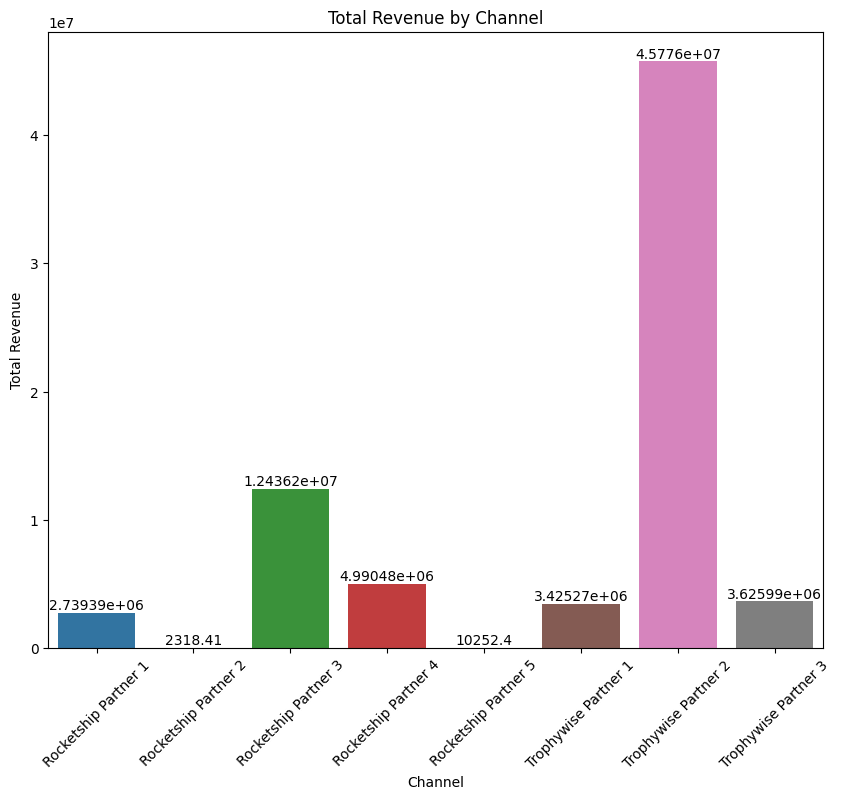

In [156]:
plt.figure(figsize = (10,8))

ax = sns.barplot(data = total_rev_channel, x = 'Channel', y = 'Event Revenue', hue = 'Channel')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')

plt.title("Total Revenue by Channel")
plt.xticks(rotation = 45)

for i in ax.containers:
  ax.bar_label(i)

plt.show()


* Trophywise Partner 2 channel has the highest revenue generated.

In [94]:
def parse_json(json_string):
    try:
        data = json.loads(json_string)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return {}
# Apply the function to the DataFrame
df['parsed_json'] = df['Parameters'].apply(parse_json)

# Extract desired values into separate columns
df['has_coupon_code'] = df['parsed_json'].apply(lambda x: x.get('has_coupon_code'))
df['No_of_items'] = df['parsed_json'].apply(lambda x: x.get('no_of_items'))
df['selling_price_total'] = df['parsed_json'].apply(lambda x: x.get('selling_price_total'))
df['Is_switch_added'] = df['parsed_json'].apply(lambda x: x.get('is_switch_added'))
df['Is_addons_added'] = df['parsed_json'].apply(lambda x: x.get('is_addons_added'))
df['Is_core_customer'] = df['parsed_json'].apply(lambda x: x.get('is_core_customer'))


In [95]:
df.head()

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,...,Is Primary Attribution,Device Model,Delta,parsed_json,has_coupon_code,selling_price_total,No_of_items,Is_switch_added,Is_addons_added,Is_core_customer
0,2/24/24 0:19,2024-02-24 00:29:00,2024-02-25 23:59:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,BR,...,True,OPPO::CPH2127,171000.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,17.0,True,True,False
1,2/25/24 23:33,2024-02-25 23:40:00,2024-02-25 23:58:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,Rocketship,Rocketship Partner 4,2.385290e+16,JK,...,True,Redmi::Redmi 8A Dual,1080.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,1.0,True,False,True
2,2/25/24 23:40,2024-02-25 23:51:00,2024-02-25 23:55:00,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,Rocketship,Rocketship Partner 4,1.202040e+17,KL,...,True,samsung::SM-A042F,240.0,"{'has_coupon_code': True, 'selling_price_total...",True,None,1.0,False,False,True
3,2/23/24 23:53,2024-02-24 00:01:00,2024-02-25 23:52:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,WB,...,False,samsung::SM-M136B,172260.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,6.0,False,True,True
4,2/25/24 19:14,2024-02-25 19:20:00,2024-02-25 23:52:00,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,Rocketship,Rocketship Partner 1,2.385290e+16,MP,...,True,samsung::SM-A505F,16320.0,"{'af_currency': 'INR', 'is_addons_added': Fals...",True,None,NaN,False,False,False


In [97]:
#quality customer
df['Quality_Cust'] = (df['Is_core_customer'] == True) & (df['Is_switch_added'] == True) & (df['has_coupon_code']== False)
df['Quality_Cust']

0        False
1         True
2        False
3        False
4        False
         ...  
84213    False
84214    False
84215    False
84216    False
84217    False
Name: Quality_Cust, Length: 83692, dtype: bool

In [102]:
quality_metrics_by_channel = df.groupby('Channel')['Quality_Cust'].mean().reset_index()
print(f"Quality Metrics by Channel:\n {quality_metrics_by_channel}")


Quality Metrics by Channel:
                 Channel  Quality_Cust
0  Rocketship Partner 1      0.199654
1  Rocketship Partner 2      0.000000
2  Rocketship Partner 3      0.181008
3  Rocketship Partner 4      0.126468
4  Rocketship Partner 5      0.000000
5  Trophywise Partner 1      0.136233
6  Trophywise Partner 2      0.147063
7  Trophywise Partner 3      0.120419


<Figure size 1000x800 with 0 Axes>

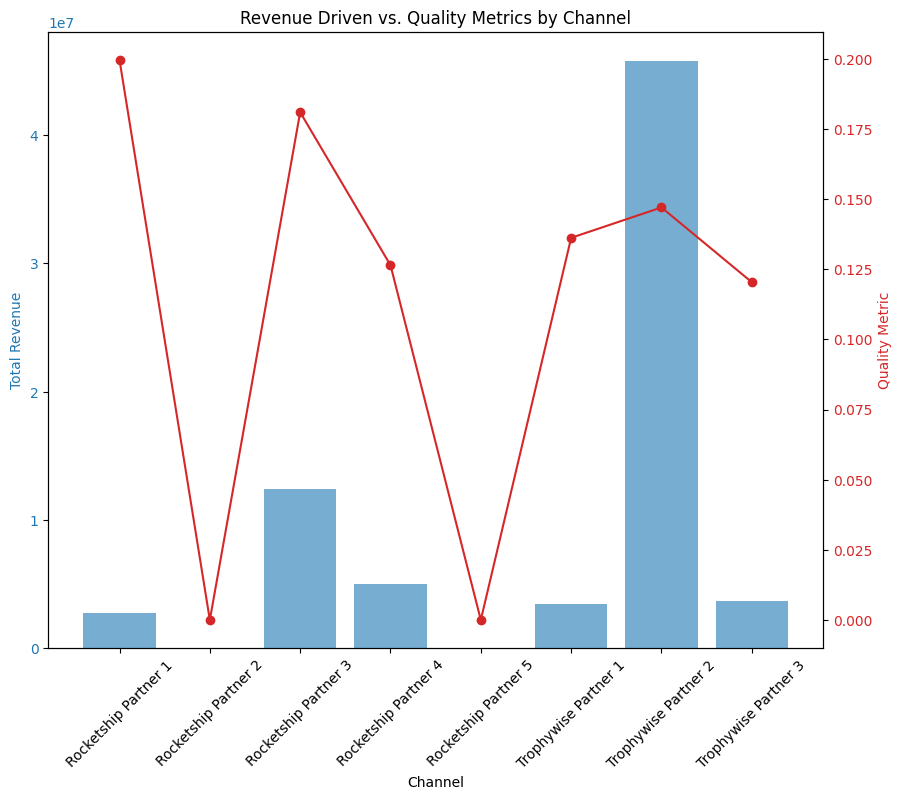

In [112]:
# Merge total revenue and quality metrics into one DataFrame
revenue_quality_df = pd.merge(total_rev_channel, quality_metrics_by_channel, on='Channel')

# Plotting the data
plt.figure(figsize = (10,8))
fig,ax1 = plt.subplots(figsize = (10,8))

color = 'tab:blue'
ax1.set_xlabel('Channel')
ax1.set_ylabel('Total Revenue', color=color)
ax1.bar(revenue_quality_df['Channel'], revenue_quality_df['Event Revenue'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation = 45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Quality Metric', color=color)
ax2.plot(revenue_quality_df['Channel'], revenue_quality_df['Quality_Cust'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Revenue Driven vs. Quality Metrics by Channel')
plt.show()


* we can see that *Rocketship Partner 1* have highest quality customer but the revenue level is low here.
* *Trophywise Partner 2* channel has generated the highest revenue as well as have good *Quality Customer*

# Location level analysis: Given the current dataset, which are the top locations in terms of coupon usage, switch medicines, & gets max core customers)

In [114]:
df.columns

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Parameters', 'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'State', 'City', 'Operator', 'Carrier', 'Language', 'Device Category',
       'OS Version', 'App Version', 'Is Primary Attribution', 'Device Model',
       'Delta', 'parsed_json', 'has_coupon_code', 'selling_price_total',
       'No_of_items', 'Is_switch_added', 'Is_addons_added', 'Is_core_customer',
       'Quality_Cust'],
      dtype='object')

In [118]:
#grouped_city_loc
grouped_state = df.groupby('State').agg({'has_coupon_code':'sum','Is_switch_added':'sum','Is_core_customer':'sum'}).reset_index()
grouped_state

,State,has_coupon_code,Is_switch_added,Is_core_customer
0,<bound method Series.mode of 0 BR\n1 ...,0,2,2
1,AN,6,6,17
2,AP,176,395,707
3,AR,20,45,92
4,AS,278,621,1464
5,BR,717,1568,3831
6,CH,17,33,130
7,CT,102,271,634
8,DH,4,8,12
9,DL,503,1078,2077


In [120]:
top_loc_with_coupon = grouped_state.sort_values('has_coupon_code',ascending = False).head(5)
top_loc_with_coupon

,State,has_coupon_code,Is_switch_added,Is_core_customer
19,MH,1442,2852,6139
35,WB,1210,2141,4985
33,UP,1154,2748,5986
5,BR,717,1568,3831
16,KA,508,1059,2121


In [121]:
with_switch_added = grouped_state.sort_values('Is_switch_added',ascending = False).head(5)
with_switch_added

,State,has_coupon_code,Is_switch_added,Is_core_customer
19,MH,1442,2852,6139
33,UP,1154,2748,5986
35,WB,1210,2141,4985
5,BR,717,1568,3831
9,DL,503,1078,2077


In [122]:
core_customer = grouped_state.sort_values('Is_core_customer',ascending = False).head(5)
core_customer

,State,has_coupon_code,Is_switch_added,Is_core_customer
19,MH,1442,2852,6139
33,UP,1154,2748,5986
35,WB,1210,2141,4985
5,BR,717,1568,3831
16,KA,508,1059,2121


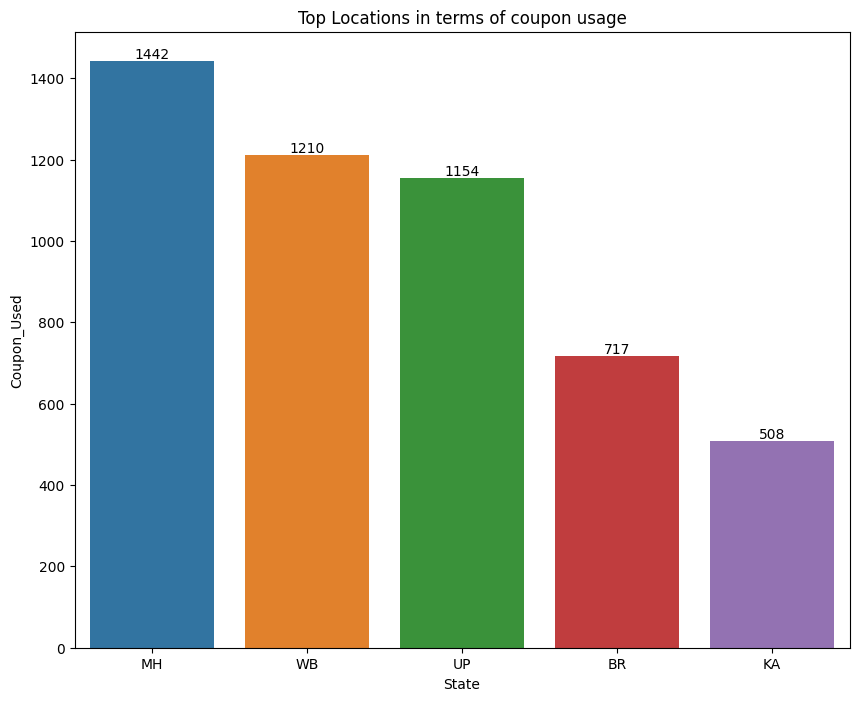

In [158]:
#top_location_with coupon_usage_
plt.figure(figsize = (10,8))


ax = sns.barplot(data = top_loc_with_coupon,x = 'State', y = 'has_coupon_code', hue = 'State')
plt.title('Top Locations in terms of coupon usage')
plt.xlabel('State')
plt.ylabel('Coupon_Used')

for i in ax.containers:
  ax.bar_label(i)



plt.show()

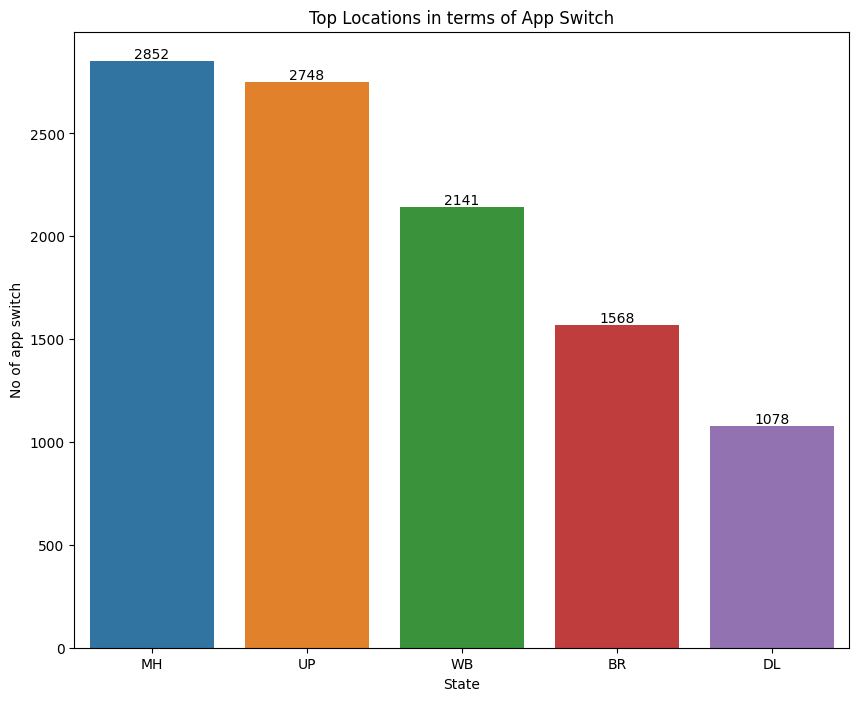

In [159]:
#top_location_with app switch_
plt.figure(figsize = (10,8))


ax = sns.barplot(data = with_switch_added,x = 'State', y = 'Is_switch_added', hue = 'State')
plt.title('Top Locations in terms of App Switch')
plt.xlabel('State')
plt.ylabel('No of app switch')

for i in ax.containers:
  ax.bar_label(i)

plt.show()

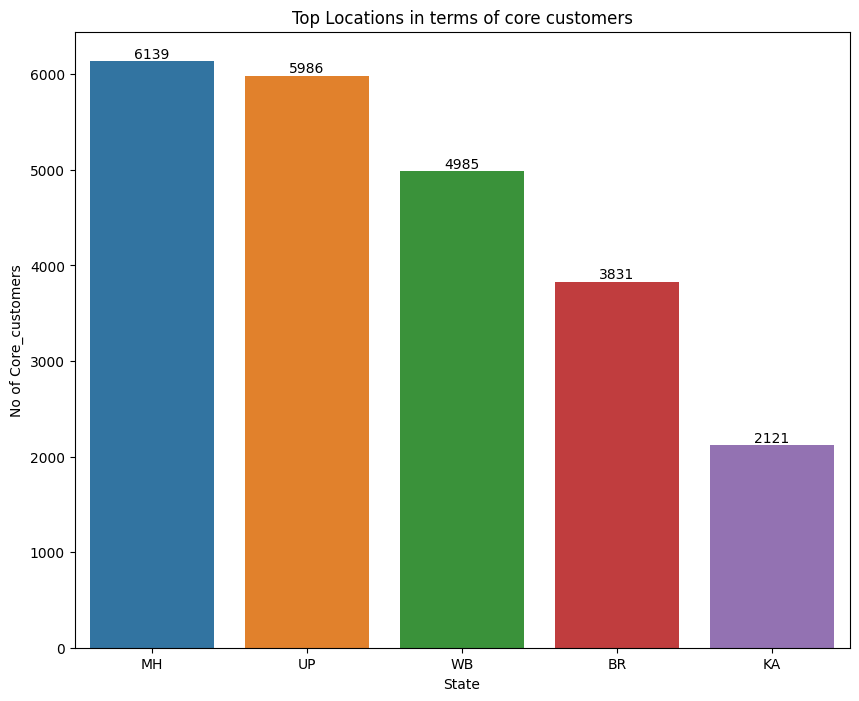

In [160]:
#top_location_with core_customer_
plt.figure(figsize = (10,8))


ax = sns.barplot(data = core_customer,x = 'State', y = 'Is_core_customer', hue = 'State')
plt.title('Top Locations in terms of core customers')
plt.xlabel('State')
plt.ylabel('No of Core_customers')

for i in ax.containers:
  ax.bar_label(i)

plt.show()

#If you were to advise the marketing team to double down on spending on such campaigns, which are the top campaigns to increase spending and why?

In [135]:
df.head()

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Media Source,Channel,Campaign ID,State,...,Device Model,Delta,parsed_json,has_coupon_code,selling_price_total,No_of_items,Is_switch_added,Is_addons_added,Is_core_customer,Quality_Cust
0,2/24/24 0:19,2024-02-24 00:29:00,2024-02-25 23:59:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,BR,...,OPPO::CPH2127,171000.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,17.0,True,True,False,False
1,2/25/24 23:33,2024-02-25 23:40:00,2024-02-25 23:58:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,Rocketship,Rocketship Partner 4,2.385290e+16,JK,...,Redmi::Redmi 8A Dual,1080.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,1.0,True,False,True,True
2,2/25/24 23:40,2024-02-25 23:51:00,2024-02-25 23:55:00,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,Rocketship,Rocketship Partner 4,1.202040e+17,KL,...,samsung::SM-A042F,240.0,"{'has_coupon_code': True, 'selling_price_total...",True,None,1.0,False,False,True,False
3,2/23/24 23:53,2024-02-24 00:01:00,2024-02-25 23:52:00,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,Trophywise,Trophywise Partner 1,1.975867e+10,WB,...,samsung::SM-M136B,172260.0,"{'has_coupon_code': False, 'selling_price_tota...",False,None,6.0,False,True,True,False
4,2/25/24 19:14,2024-02-25 19:20:00,2024-02-25 23:52:00,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,Rocketship,Rocketship Partner 1,2.385290e+16,MP,...,samsung::SM-A505F,16320.0,"{'af_currency': 'INR', 'is_addons_added': Fals...",True,None,NaN,False,False,False,False


In [143]:
# grouping the neccesary columns that will help us identify which campaign is profitable
grouped_campaign = df.groupby('Campaign ID').agg({
    'Event Revenue': 'sum',
    'has_coupon_code': 'sum',
    'Is_switch_added': 'sum',
    'Is_core_customer': 'sum'
}).reset_index()
# Identifying top campaigns based on Event Revenue
top_campaigns = grouped_campaign.sort_values('Event Revenue', ascending=False).head(5)

print("Top campaigns to increase spending based on Event Revenue:")
print(top_campaigns)


Top campaigns to increase spending based on Event Revenue:
     Campaign ID  Event Revenue  has_coupon_code  Is_switch_added  \
5   1.976969e+10    42763479.97             4514            10102   
18  2.385290e+16    14745116.46             2383             5042   
7   2.083574e+10     7917381.81             1148             2299   
20  1.202040e+17     3137247.96              478              931   
19  1.202030e+17     1742453.78              475              697   

   Is_core_customer  
5             24129  
18             9726  
7              5285  
20             1925  
19             1262  


* we have *Campaign id: 1.976969e+10* earning the highest revenue.
* we can also see here that in these campaIGNS company had distributed more *coupon_codes* as well as most of the customers in these campaigns had made *Switch*

# Insights:
* Maharastra MH is the top performing states with most no of users.
* we have Campaign id: 1.976969e+10 earning the highest revenue.
* we can see that *Rocketship Partner 1* have highest quality customer but the revenue level is low here.
* *Trophywise Partner 2* channel has generated the highest revenue as well as have good *Quality Customer*
* Trophywise Partner 2 channel has the highest revenue generated.


* *Lots of people needs to get familiarized to the app before onboarding to the the app so this might be one of the reason*
* *Delay may also happen when a user was unable to engage with the Events or Campaign organised by the company so, if on campaign 1 if the user doesnt engage or get familiarize with the product it might also happen in another Event or campaign. it's with human tendency at first time a person may not be impressed second time again may not be impressed and at third time there might be a chance he might be interseted.*
* *Certain features of the app or websites at first time the user may not be unable to discover or use but by time that might change and also this may lead to delay of user onboarding, **means complex UI may be tough for some people, company can come up with easy mode UI just like in our phone keep it simple** .*

* *Last is make the Campaign more effective more engagement with the user make them feel the need (**Like 5why's why u need this**).*